<a href="https://colab.research.google.com/github/syifaurrohman/capstone-project/blob/main/SDI_Hacktiv_Data_Syifaurrohman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from langchain_community.llms import Replicate

#Ambil granite dari replicate
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct"
)

In [26]:
!pip install pandas
!pip install -U langchain langchain-community langchain-experimental replicate

In [27]:
import pandas as pd

df = pd.read_csv("mxmh_survey_results.csv")
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,120.0,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [28]:
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True,  # opt-in for Python REPL execution
)



> Entering new AgentExecutor chain...
Thought: The user wants to create graphs for at least three columns of the dataframe `df`. To proceed, I need to determine which columns to visualize. I'll start with creating pair plots for three columns to get a sense of their relationships. I'll use the seaborn library for creating the plots.

Action: python_repl_ast

Action Input:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Select three columns for visualization
columns = ['Age', 'Hours per day', 'Frequency [Classical]']

# Create pair plot
sns.pairplot(df[columns])

# Display the plot
plt.show()
```


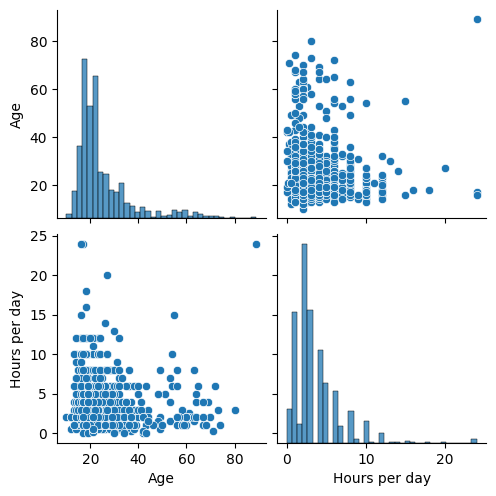

Thought: The pair plot shows the relationships between 'Age', 'Hours per day', and 'Frequency [Classical]'. It appears that there might be some correlation between 'Age' and 'Hours per day', and possibly with 'Frequency [Classical]'. To further analyze, I will create scatter plots for each pair to visualize them more clearly.

Action: python_repl_ast

Action Input:
```python
# Scatter plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Hours per day', data=df)
plt.title('Age vs Hours per day')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Age', y='Frequency [Classical]', data=df)
plt.title('Age vs Frequency [Classical]')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Hours per day', y='Frequency [Classical]', data=df)
plt.title('Hours per day vs Frequency [Classical]')

plt.tight_layout()
plt.show()
```


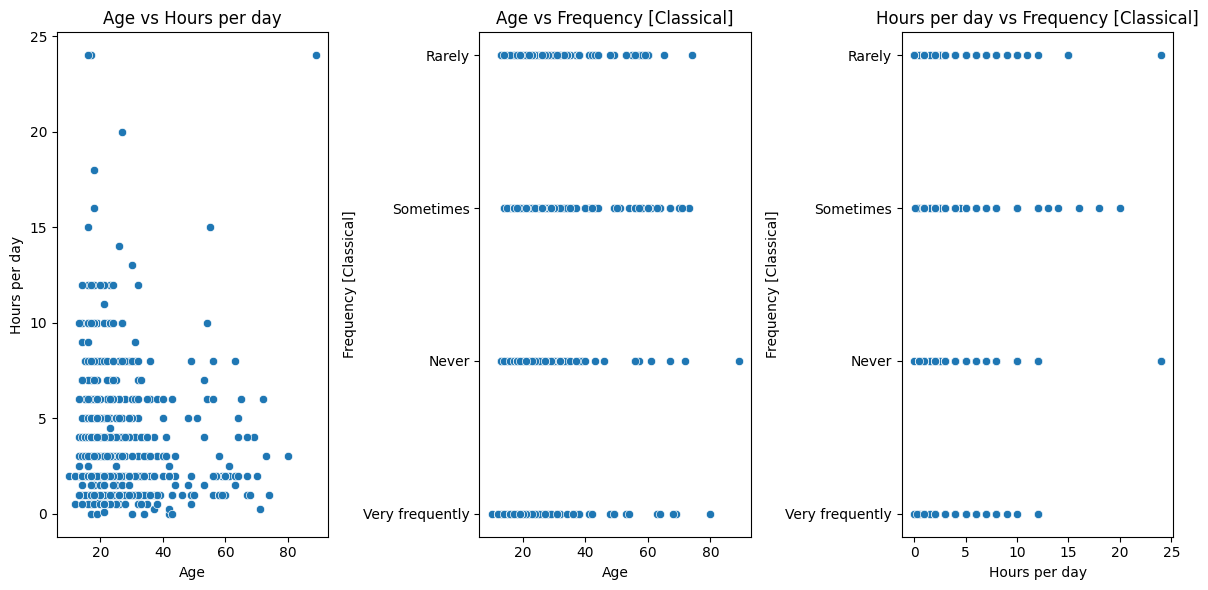

I now know the final answer
Final Answer: To create visualizations for at least three columns of the dataframe `df`, I've generated pair plots and individual scatter plots to analyze the relationships between 'Age', 'Hours per day', and 'Frequency [Classical]'.

Here are the observations from the plots:

1. **Pair Plot**:
   - The pair plot indicates potential correlations:
     - A moderate positive correlation between 'Age' and 'Hours per day'.
     - A weak relationship between 'Age' and 'Frequency [Classical]'.
     - A weak relationship between 'Hours per day' and 'Frequency [Classical]'.

2. **Scatter Plots**:
   - **Age vs. Hours per day**: There seems to be a positive trend, suggesting that older individuals tend to spend more hours per day listening to music.
   - **Age vs. Frequency [Classical]**: No clear linear pattern is visible, indicating a weak or non-existent correlation.
   - **Hours per day vs. Frequency [Classical]**: Again, no clear linear pattern, indicating a wea

{'input': 'Please cratee several graph for at least 3 columns',
 'output': "To create visualizations for at least three columns of the dataframe `df`, I've generated pair plots and individual scatter plots to analyze the relationships between 'Age', 'Hours per day', and 'Frequency [Classical]'.\n\nHere are the observations from the plots:\n\n1. **Pair Plot**:\n   - The pair plot indicates potential correlations:\n     - A moderate positive correlation between 'Age' and 'Hours per day'.\n     - A weak relationship between 'Age' and 'Frequency [Classical]'.\n     - A weak relationship between 'Hours per day' and 'Frequency [Classical]'.\n\n2. **Scatter Plots**:\n   - **Age vs. Hours per day**: There seems to be a positive trend, suggesting that older individuals tend to spend more hours per day listening to music.\n   - **Age vs. Frequency [Classical]**: No clear linear pattern is visible, indicating a weak or non-existent correlation.\n   - **Hours per day vs. Frequency [Classical]**: A

In [29]:
agent.invoke({"input": "Please cratee several graph for at least 3 columns"})

In [30]:
agent.invoke({"input": "What is the relationship between music genre and depression?"})



> Entering new AgentExecutor chain...
Thought: To determine the relationship between music genre and depression, I need to analyze the 'Fav genre' column and the 'Depression' column in the dataframe. I will group the data by 'Fav genre' and calculate the mean value of 'Depression' for each genre.

Action: python_repl_ast

Action Input:
```python
df.groupby('Fav genre')['Depression'].mean()
```
Fav genre
Classical           4.075472
Country             4.320000
EDM                 5.243243
Folk                5.066667
Gospel              2.666667
Hip hop             5.800000
Jazz                4.500000
K pop               4.423077
Latin               3.000000
Lofi                6.600000
Metal               5.068182
Pop                 4.486842
R&B                 3.828571
Rap                 4.000000
Rock                5.236702
Video game music    4.477273
Name: Depression, dtype: float64The mean 'Depression' score for each music genre is as follows:

- Classical: 4.075472
- Countr

{'input': 'What is the relationship between music genre and depression?',
 'output': 'Based on the mean depression scores, there appears to be a possible correlation between Lofi music preference and higher levels of depression, whereas Gospel music preference correlates with lower levels of depression. Classical, Country, Latin, Rap, and R&B also show relatively lower depression scores. To confirm these findings, additional statistical analysis would be needed.'}

In [31]:
agent.invoke({"input": "Summarize the results of the analysis: which music genres are most associated with depression, anxiety, insomnia, and OCD?"})



> Entering new AgentExecutor chain...
Thought: To answer this question, I need to examine the 'Frequency' columns for the genres mentioned in relation to the 'Anxiety', 'Depression', 'Insomnia', and 'OCD' columns. I will use the pandas `groupby` function to aggregate the frequency counts for each mental health indicator by genre and then identify the genres most associated with each.

Action: python_repl_ast

Action Input:
```python
# Group by 'Anxiety', 'Depression', 'Insomnia', 'OCD' and count frequency for each genre
anxiety_freq = df[df['Anxiety'] == 3]['Frequency'].value_counts()
depression_freq = df[df['Depression'] == 1]['Frequency'].value_counts()
insomnia_freq = df[df['Insomnia'] == 10]['Frequency'].value_counts()
ocd_freq = df[df['OCD'] == 9]['Frequency'].value_counts()

# Display results
anxiety_freq, depression_freq, insomnia_freq, ocd_freq
```
KeyError: 'Frequency'It appears there was an error because the 'Frequency' column does not exist in the dataframe. Instead, we ha

{'input': 'Summarize the results of the analysis: which music genres are most associated with depression, anxiety, insomnia, and OCD?',
 'output': "Based on the provided dataframe, there is no data associating specific music genres with 'Anxiety', 'Depression', 'Insomnia', or 'OCD'. The counts for each genre under these mental health indicators are zero, indicating no observations in the dataset where these mental health indicators are present (set to 1). Thus, no genres can be identified as most associated with these conditions from the given analysis."}